In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size':15})

In [2]:
bolt_df = pd.read_csv('../data/BoltData.csv', names=('distance', 'err_distance', 'time', 'err_time'), header=0)

In [3]:
bolt_df

,distance,err_distance,time,err_time
0,0,0.02,0.000000,1.004810
1,10,0.02,0.923422,0.637569
2,20,0.02,2.178145,0.382366
3,30,0.02,2.461897,0.911785
4,40,0.02,3.387051,0.198510
5,50,0.02,5.263879,1.152222
6,60,0.02,6.042705,0.161827
7,70,0.02,7.939192,0.732011
8,80,0.02,8.221779,1.267329
9,90,0.02,8.578128,0.590908


In [4]:
def line(x, slope, intercept):          # Set up the linear fitting - don't ammend
    return slope*x + intercept          # More set up, leave alone.

# Next few line, fits a line to the (x data, and y data) no need to change things.
popt, pcov = curve_fit(line,bolt_df.distance,bolt_df.time)
slope = popt[0]
intercept = popt[1]
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))

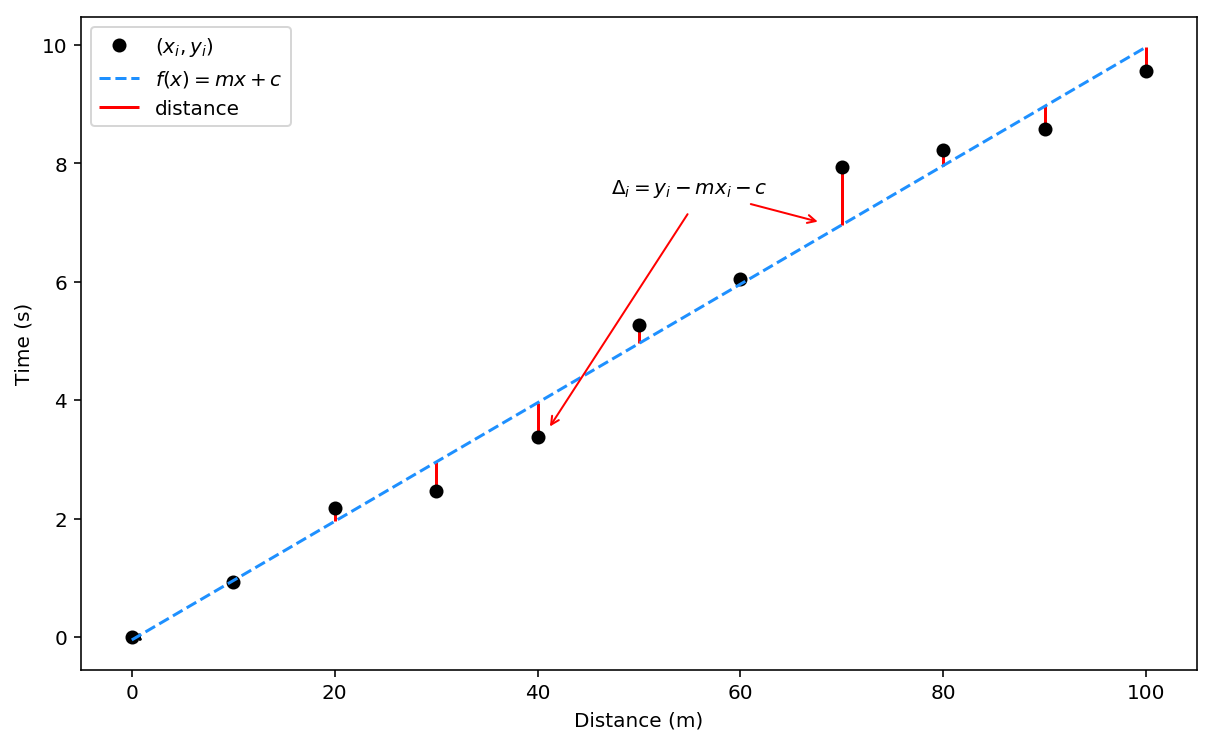

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
#ax.errorbar(bolt_df.distance, bolt_df.time, yerr=bolt_df.err_time, color='k', marker='o', linestyle='None')
ax.plot(bolt_df.distance, bolt_df.time, 'ko', ls='None', label='($x_i, y_i$)')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Time (s)')
ax.plot(bolt_df.distance, bolt_df.distance*slope+intercept, 
         linestyle='--',
         color='dodgerblue',
         label='$f(x) = m x + c$')

delta_y = bolt_df.time - bolt_df.distance*slope+intercept
ax.vlines(bolt_df.distance, bolt_df.time, bolt_df.distance*slope+intercept, 'r')
#ax.set_ylim(0,10)
#ax.annotate('Minimise $\Delta y$\'s', xy=(68, 7), xycoords='data',fontsize=14, ha='center')
ax.arrow(0.726, 0.056, 0.113, -0.092, head_width=0.03, head_length=0.03, fc='k', ec='k')
#ax4.arrow(1.032, 0.143, 0.748, -0.169, head_width=0.03, head_length=0.03, fc='k', ec='k')plt.show()
#ax.annotate("Minimise $\sum(\Delta y)^2$", xy=(68, 7), xytext=(55, 7.5),arrowprops=dict(arrowstyle="->", color='r'), ha='center')
ax.annotate("$\Delta_i = y_i - m x_i - c$", xy=(68, 7), xytext=(55, 7.5),arrowprops=dict(arrowstyle="->", color='r'), ha='center')
ax.annotate("", xy=(41, 3.5), xytext=(55, 7.2),arrowprops=dict(arrowstyle="->", color='r'), ha='center')
plt.legend()
plt.savefig('../images/delta_plot.png', dpi=300)
plt.show()

In [6]:
print(slope, intercept)

0.10015849092440099 -0.04800871322956479


doing least squares by hand

normal equations

$$
\sum y = a n + b \sum x
$$

$$
\sum xy = a \sum x + b \sum x^2
$$

Need to find $\sum y$, $\sum x$, $\sum xy$, $\sum x^2$ and $n$

In [7]:
sum_y = np.sum(bolt_df.time)
sum_x = np.sum(bolt_df.distance)
sum_xy = np.sum((bolt_df.time * bolt_df.distance))
sum_x2 = np.sum((bolt_df.time)**2)
n = np.size(bolt_df.time)

In [8]:
print(sum_y, sum_x, sum_xy, sum_x2, n)

54.559074164 550 3829.69710839 383.0140610297195 11


Rearrange the equations:


From first normal equation (diff wrt a)
$$
b \sum x = \sum y - an
$$

$$
b = \dfrac{\sum y - an}{\sum x}
$$

From second normal equation (diff wrt b)

$$
b \sum x^2 = \sum xy - a \sum x \\
b = \dfrac{\sum xy - a \sum x}{\sum x^2}
$$


Need to get just a or b not both



In [9]:
a = (sum_xy*sum_x - sum_y*sum_x2) / ((sum_x)**2 - (sum_x2*n))

In [10]:
print(a)

6.991379437987105


In [11]:
b = (sum_y - a*n) / sum_x
print(b)

-0.04062927209792391


In [12]:
x_data = np.array((-2.4, -0.8, 0.3, 1.9, 3.2))
y_data = np.array((-5.0, -1.5, 2.5, 6.4, 11.0))

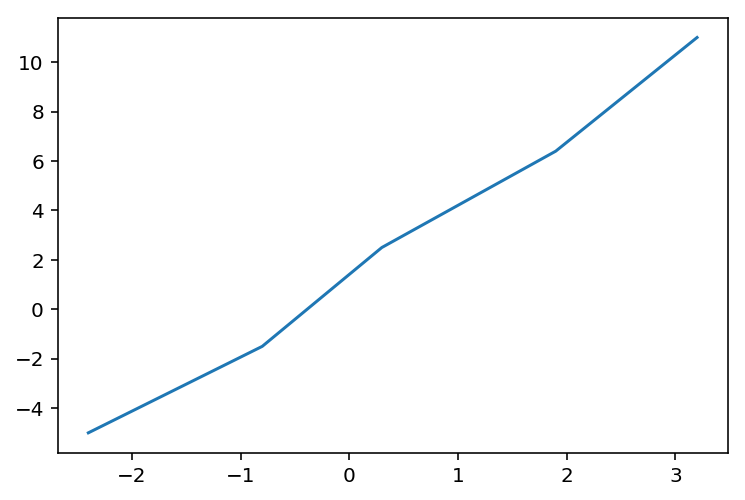

In [13]:
plt.plot(x_data, y_data)

In [14]:
def line(x, slope, intercept):          # Set up the linear fitting - don't ammend
    return slope*x + intercept          # More set up, leave alone.

# Next few line, fits a line to the (x data, and y data) no need to change things.
popt, pcov = curve_fit(line,x_data, y_data)
slope = popt[0]
intercept = popt[1]
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))

In [15]:
print(slope, intercept)

2.8605203389805864 1.4213710552870729


In [16]:
sum_y = np.sum(y_data)
sum_x = np.sum(x_data)
sum_xy = np.sum((x_data * y_data))
sum_x2 = np.sum((x_data)**2)
n = np.size(x_data)

In [17]:
print(sum_y, sum_x, sum_xy, sum_x2, n)

13.4 2.1999999999999997 61.31 20.340000000000003 5


In [18]:
b = (sum_xy / sum_x - sum_y / n) / (sum_x2 / sum_x - sum_x/n)
print(b)

2.860520338633078


In [19]:
a = (sum_y - b*sum_x)/n
print(a)

1.421371051001446


In [20]:
plt.savefig('../images/boltanswer.png', dpi=300)



<Figure size 432x288 with 0 Axes>

# Introduction

## Overview:
- **Teaching:** 0 min
- **Exercises:** 0 min

**Questions**
- Ask some questions?

**Objectives**
- Set some objectives

Add lesson material here

## Key Points:
- Conclude with some key points